In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cvxopt as opt
from cvxopt import blas, solvers
import pandas as pd

def optimal_portfolio(returns):
    
    print(1)
    n = len(returns)
    returns = np.asmatrix(returns)
    
    print(2)
    N = 100
    mus = [10**(5.0 * t/N - 1.0) for t in range(N)]
    
    print(3)
    # Convert to cvxopt matrices
    S = opt.matrix(np.cov(returns))
    pbar = opt.matrix(np.mean(returns, axis=1))
    
    print(4)
    # Create constraint matrices
    G = -opt.matrix(np.eye(n))   # negative n x n identity matrix
    h = opt.matrix(0.0, (n ,1))
    A = opt.matrix(1.0, (1, n))
    b = opt.matrix(1.0)
    
    print(5)
    # Calculate efficient frontier weights using quadratic programming
    portfolios = [solvers.qp(mu*S, -pbar, G, h, A, b)['x'] 
                  for mu in mus]
    
    print(6)
    ## CALCULATE RISKS AND RETURNS FOR FRONTIER
    returns = [blas.dot(pbar, x) for x in portfolios]
    risks = [np.sqrt(blas.dot(x, S*x)) for x in portfolios]
    
    print(7)
    ## CALCULATE THE 2ND DEGREE POLYNOMIAL OF THE FRONTIER CURVE
    m1 = np.polyfit(returns, risks, 2)
    x1 = np.sqrt(m1[2] / m1[0])
    print(8)
    
    # CALCULATE THE OPTIMAL PORTFOLIO
    wt = solvers.qp(opt.matrix(x1 * S), -pbar, G, h, A, b)['x']
    print(9)
    return np.asarray(wt), returns, risks

In [65]:
import numpy
from pymongo import MongoClient
from datetime import datetime, timedelta as td

def GetDataSerieFromMongo(stock,startDate='',endDate=''):
   
    client = MongoClient()
    db = client.Project
    
    if startDate=='' and endDate=='':
        data = list(db.HistPrices.find({'BBGTicker':stock})) 
    else:
        d1 = datetime.strptime(startDate, '%Y-%m-%d')
        d2 = datetime.strptime(endDate, '%Y-%m-%d') 
        delta = (d2-d1).days+1
        dateList=[]
        
        for i in range(delta):
            dateList.append((d1+td(days=i)).strftime('%Y-%m-%d'))
            
        data = list(db.HistPrices.find({'Date':{"$in":dateList},'BBGTicker':stock})) 
    
    headers= ['BBGTicker','Close','Date','High','Low','Name','Open','Volume','_id']    
    records=[]
    records.append(headers)
    
    for i in range(len(data)):
        records.append([data[i]['BBGTicker'],
                        data[i]['Close'],
                        data[i]['Date'],
                        data[i]['High'],
                        data[i]['Low'],
                        data[i]['Name'],
                        data[i]['Open'],
                        data[i]['Volume'],
                        data[i]['_id']])
        
    return numpy.asarray(records)

def DataFrameFromMongo(stock,startDate='',endDate=''):
   
    client = MongoClient()
    db = client.Project
    
    if startDate=='' and endDate=='':
        data = pd.DataFrame(list(db.HistPrices.find({'BBGTicker':stock})))
    else:
        d1 = datetime.strptime(startDate, '%Y-%m-%d')
        d2 = datetime.strptime(endDate, '%Y-%m-%d') 
        delta = (d2-d1).days+1
        dateList=[]
        for i in range(delta):
            dateList.append((d1+td(days=i)).strftime('%Y-%m-%d'))
        data = pd.DataFrame(list(db.HistPrices.find({'Date':{"$in":dateList},'BBGTicker':stock})))
    
    #headers= ['BBGTicker','Close','Date','High','Low','Name','Open','Volume','_id']    
    records = pd.DataFrame({stock:np.array(data['Close'])}, index=data['Date'])
    #records.append(headers)
    #for i in range(len(data)):
        #records.append([data[i]['BBGTicker'],
                        #data[i]['Close'],
                        #data[i]['Date'],
                        #data[i]['High'],
                        #data[i]['Low'],
                        #data[i]['Name'],
                        #data[i]['Open'],
                        #data[i]['Volume'],
                        #data[i]['_id']])
    return (records)

In [66]:
#stock = "EXPD"
#client = MongoClient()
#db = client.Project
#data = pd.DataFrame(list(db.HistPrices.find({'BBGTicker':stock})))   
#records = pd.DataFrame({stock:np.array(data['Close'])}, index=data['Date'])
#records.head()

In [67]:
from pymongo import MongoClient
client = MongoClient()
db = client.Project

startDate = ''
endDate = ''
stocks =[x['BBGTicker'] for x in list(db.Stocks.find({}))]

AllPrices = pd.DataFrame() 
if startDate=='' and endDate=='':
    print("suck1")
else:
    print("suck2")
    #d1 = datetime.strptime(startDate, '%Y-%m-%d')
    #d2 = datetime.strptime(endDate, '%Y-%m-%d') 
    #delta = (d2-d1).days+1
    #for i in range(delta):
        #db.HistSignals.delete_many({'Date':(d1+td(days=i)).strftime('%Y-%m-%d')})
        
        
for s in stocks:
    print(s)
    if startDate=='' and endDate=='':
        data = DataFrameFromMongo(s) 
    else:
        d = (datetime.strptime(startDate, '%Y-%m-%d') - td(days=90)).strftime('%Y-%m-%d')
        data = DataFrameFromMongo(s,d,endDate)
            
    AllPrices = pd.concat([AllPrices, data], axis=1)
    #AllPrices.append(data)
print("Get LOST.")

suck1
EXPD
ESRX
FB
FAST
FISV
GRMN
GILD
HSIC
ILMN
INCY
INTC
INTU
ISRG
KLAC
GMCR
KHC
LRCX
LBTYA
LMCA
LVNTA
LLTC
MAR
MAT
MU
MSFT
MDLZ
MNST
MYL
NTAP
NFLX
NVDA
ORLY
PCAR
PAYX
QCOM
REGN
ROST
SNDK
SBAC
STX
SIRI
SWKS
SPLS
SBUX
SRCL
SYMC
TSLA
TXN
PCLN
TSCO
TRIP
VRSK
VRTX
VIAB
VIP
VOD
WBA
WDC
WFM
WYNN
XLNX
YHOO
FOXA
FOX
ATVI
ADBE
AKAM
ALXN
GOOGL
GOOG
AMZN
AAL
AMGN
ADI
AAPL
AMAT
ADSK
ADP
AVGO
BIDU
BBBY
BIIB
BMRN
BRCM
CHRW
CA
CELG
CERN
CHTR
CHKP
CSCO
CTXS
CTSH
CMCSK
CMCSA
COST
DISCA
DISCK
DISH
DLTR
EBAY
EA
Get LOST.


In [71]:
AllPrices.pct_change()

,EXPD,ESRX,FB,FAST,FISV,GRMN,GILD,HSIC,ILMN,INCY,...,CTSH,CMCSK,CMCSA,COST,DISCA,DISCK,DISH,DLTR,EBAY,EA
2016-10-10,-0.000582,0.007279,0.009691,-0.004255,0.005601,0.002678,0.003323,0.007851,0.001951,-0.019217,...,0.001986,NaN,0.006426,0.001933,-0.004785,-0.003020,0.009919,-0.000641,0.010436,0.011097
2016-10-11,-0.006990,-0.021822,-0.010442,-0.051282,-0.014024,-0.012533,-0.022122,-0.027049,-0.248093,-0.040021,...,-0.011100,NaN,-0.012466,0.004858,-0.023669,-0.022340,-0.011964,-0.008727,-0.015336,-0.016167
2016-10-12,0.003911,0.001883,0.001319,-0.022523,0.009684,0.003953,-0.010702,-0.001135,-0.020217,-0.023233,...,0.001804,NaN,0.004310,-0.003642,-0.008712,-0.010457,0.004880,0.002978,0.001271,-0.010076
2016-10-13,-0.007012,-0.001735,-0.009531,-0.018433,-0.003597,-0.005596,0.000411,-0.015147,0.007270,-0.004891,...,0.025410,NaN,-0.001839,-0.001595,-0.018724,-0.020744,0.024820,0.009810,0.000317,-0.009330
2016-10-14,0.000392,0.010429,0.000704,0.000000,0.003309,0.007295,-0.004243,-0.017238,0.006051,-0.027142,...,-0.017463,NaN,0.001689,-0.000333,-0.013240,-0.011591,-0.000176,-0.014572,0.012060,0.010152


In [75]:
AllRets = AllPrices.pct_change()

#AllPrices[1]
#numpy.array(AllPrices[1:,1], dtype='f8')
#AllPrices[1][1:,1]
#AllPrices[1][1:,1].pct_change()

# Preallocate DataFrame
#AllRets =pd.DataFrame()

#for stockIndex in range(0, len(stocks)-1):
    #print(stock)
    #stockIndex = 1
    #Prices = pd.DataFrame({'Close':AllPrices[stockIndex][1:,1]},index=AllPrices[stockIndex][1:,2])
    #Rets = pd.concat([Prices["Close"].pct_change()], axis=1).dropna()
    #stockName = AllPrices[stockIndex][1,0]
    #Rets.columns=[stockName]
    #AllRets = pd.concat([AllRets, Rets])
    #print(stockName)
AllRets.tail()
#AllRets = Rets

,EXPD,ESRX,FB,FAST,FISV,GRMN,GILD,HSIC,ILMN,INCY,...,CTSH,CMCSK,CMCSA,COST,DISCA,DISCK,DISH,DLTR,EBAY,EA
2016-10-10,-0.000582,0.007279,0.009691,-0.004255,0.005601,0.002678,0.003323,0.007851,0.001951,-0.019217,...,0.001986,NaN,0.006426,0.001933,-0.004785,-0.003020,0.009919,-0.000641,0.010436,0.011097
2016-10-11,-0.006990,-0.021822,-0.010442,-0.051282,-0.014024,-0.012533,-0.022122,-0.027049,-0.248093,-0.040021,...,-0.011100,NaN,-0.012466,0.004858,-0.023669,-0.022340,-0.011964,-0.008727,-0.015336,-0.016167
2016-10-12,0.003911,0.001883,0.001319,-0.022523,0.009684,0.003953,-0.010702,-0.001135,-0.020217,-0.023233,...,0.001804,NaN,0.004310,-0.003642,-0.008712,-0.010457,0.004880,0.002978,0.001271,-0.010076
2016-10-13,-0.007012,-0.001735,-0.009531,-0.018433,-0.003597,-0.005596,0.000411,-0.015147,0.007270,-0.004891,...,0.025410,NaN,-0.001839,-0.001595,-0.018724,-0.020744,0.024820,0.009810,0.000317,-0.009330
2016-10-14,0.000392,0.010429,0.000704,0.000000,0.003309,0.007295,-0.004243,-0.017238,0.006051,-0.027142,...,-0.017463,NaN,0.001689,-0.000333,-0.013240,-0.011591,-0.000176,-0.014572,0.012060,0.010152


In [28]:
#stockIndex = 0
# Preallocate DataFrame
#AllRets = pd.Series()
#AllPrices[stockIndex][1:,1]

#Prices = pd.Series({'Close':AllPrices[stockIndex][1:,1]},index=AllPrices[stockIndex][1:,2])
#pd.Series(AllPrices[stockIndex][1:,1], index=AllPrices[stockIndex][1:,2]).tail()
#for stockIndex in range(0, len(stocks)-1):
    #Prices = pd.DataFrame({'Close':AllPrices[stockIndex][1:,1]},index=AllPrices[stockIndex][1:,2])
    #Rets = pd.concat([Prices["Close"].pct_change()], axis=1).dropna()
    #stockName = AllPrices[stockIndex][1,0]
    #Rets.columns=[stockName]
    #AllRets = pd.concat([AllRets, Rets])
    #print(stockName)
#AllRets.head()

2016-10-10     51.5
2016-10-11    51.14
2016-10-12    51.34
2016-10-13    50.98
2016-10-14       51
dtype: object

In [6]:
#del AllPrices

In [7]:
#AllRets.tail()

,AAL,AAPL,ADBE,ADI,ADP,ADSK,AKAM,ALXN,AMAT,AMGN,...,VIP,VOD,VRSK,VRTX,WBA,WDC,WFM,WYNN,XLNX,YHOO
2016-10-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#AllRets[stocks[1:10]].head()

,ESRX,FB,FAST,FISV,GRMN,GILD,HSIC,ILMN,INCY
1990-03-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-03-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-03-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-03-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-04-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#import stocks.py
#start = '10/17/2010'
#end = '10/17/2016'

#r_avg = map(lambda x: x.mean(), AllRets)

# covariance of asset returns
#sigma = numpy.array(stocks.cov_matrix(symbols, start, end, 'y'))

#AllRets[stocks[0]].mean()
#symbols = stocks # For simplicity
#lambda s: stocks.avg_return(s, start, end, 'y')
# average yearly return for each stock
#r_avg = map(lambda s: stocks.avg_return(s, start, end, 'y'), symbols)

In [10]:
#AllRets.mean()
#np.mean(np.asmatrix(AllRets), axis=1)
#np.asmatrix(AllRets.mean())

,EXPD,ESRX,FB,FAST,FISV,GRMN,GILD,HSIC,ILMN,INCY,...,CTXS,CTSH,CMCSA,COST,DISCA,DISCK,DISH,DLTR,EBAY,EA
2016-07-14,0.000199,0.010814,0.004367,0.000000,-0.000181,0.009704,-0.002449,0.001877,0.009393,-0.005087,...,0.009514,0.007694,0.002693,0.000959,0.008239,0.008157,0.007234,0.006783,0.038217,0.005540
2016-07-15,-0.003388,-0.001510,-0.003666,0.003464,-0.001900,0.006035,0.013210,-0.004795,0.010052,0.020575,...,-0.000589,-0.020020,-0.001940,-0.003175,-0.024903,-0.015777,-0.013797,-0.006947,0.009969,-0.002819
2016-07-18,0.001600,0.004412,0.021479,-0.010817,-0.000725,0.009331,0.003000,0.001883,0.005783,0.003579,...,-0.001297,0.003809,-0.000299,0.006610,0.009577,0.004110,0.002683,0.014734,0.005695,0.005525
2016-07-19,-0.001597,-0.008534,0.010388,-0.012564,0.001179,0.005063,-0.017140,-0.002266,-0.005950,-0.015571,...,0.004249,-0.005347,0.003440,0.003642,-0.005138,0.000409,-0.004396,-0.003865,0.000378,-0.022489
2016-07-20,-0.003800,0.002278,0.010861,0.002592,0.004711,0.000876,0.014279,0.001939,0.026298,0.049022,...,0.010577,0.018207,0.000447,-0.000476,0.005562,0.001637,-0.002304,0.000944,0.018491,0.002614
2016-07-21,-0.005621,-0.007451,-0.010745,-0.016686,-0.008836,0.000219,0.006693,-0.006303,-0.008094,0.010474,...,-0.008955,-0.006982,-0.001192,-0.005891,0.003556,0.003268,0.032519,-0.008067,0.108929,-0.016819
2016-07-22,0.012720,0.003436,0.003234,0.006692,0.005003,0.007438,-0.007909,0.005230,-0.003931,-0.015719,...,0.021826,0.000857,0.006265,0.002514,0.004331,0.008958,-0.003354,0.015315,0.018710,0.012200
2016-07-25,-0.003987,-0.018641,0.005207,-0.004748,-0.001177,-0.002823,0.023108,-0.004594,-0.000796,0.000231,...,0.013780,0.000685,0.000148,0.002986,-0.001960,-0.001614,-0.022999,0.002705,0.006232,0.007468
2016-07-26,0.010008,0.014214,-0.003371,0.001431,0.005165,0.010235,-0.084698,0.005894,-0.003585,0.006132,...,0.011894,0.003767,-0.004298,-0.002381,0.007070,0.004446,-0.000957,0.002697,0.023468,-0.000780
2016-07-27,-0.010107,-0.016308,0.017489,-0.001906,-0.008294,0.116404,0.009130,-0.010393,0.080946,0.020239,...,-0.015113,-0.006312,0.011015,-0.008474,-0.007020,-0.003622,-0.003065,-0.009622,-0.002866,-0.002212


In [81]:
returns = AllRets.tail(22*3).dropna(axis=1, how='any')

print(1)
n = len(returns)
returns = np.asmatrix(returns)
    
print(2)
N = 100
mus = [10**(5.0 * t/N - 1.0) for t in range(N)]
    
print(3)
# Convert to cvxopt matrices
S = opt.matrix(np.cov(returns))
pbar = opt.matrix(np.mean(returns, axis=1))

1
2
3


,EXPD,ESRX,FB,FAST,FISV,GRMN,GILD,HSIC,ILMN,INCY,...,CTSH,CMCSK,CMCSA,COST,DISCA,DISCK,DISH,DLTR,EBAY,EA
EXPD,2.316984e-05,0.000041,0.000031,0.000051,4.029164e-05,0.000034,0.000009,0.000043,0.000271,-0.000003,...,-2.505704e-05,NaN,0.000027,-0.000009,2.952847e-05,0.000029,-5.165407e-06,-6.104428e-06,0.000032,0.000027
ESRX,4.094354e-05,0.000160,0.000080,0.000250,1.016434e-04,0.000096,0.000104,0.000112,0.001310,0.000081,...,8.594779e-06,NaN,0.000087,-0.000025,7.621177e-05,0.000077,7.984560e-05,3.385210e-06,0.000136,0.000131
FB,3.065922e-05,0.000080,0.000071,0.000120,6.292921e-05,0.000053,0.000047,0.000101,0.000525,0.000010,...,-2.897431e-05,NaN,0.000053,-0.000005,6.105918e-05,0.000067,9.048832e-06,-8.336308e-06,0.000071,0.000084
FAST,5.092749e-05,0.000250,0.000120,0.000408,1.405819e-04,0.000141,0.000178,0.000160,0.002038,0.000134,...,1.601302e-05,NaN,0.000128,-0.000031,1.103496e-04,0.000115,1.335581e-04,-3.216957e-06,0.000219,0.000226
FISV,4.029164e-05,0.000102,0.000063,0.000141,8.638343e-05,0.000069,0.000054,0.000105,0.000834,0.000045,...,8.740418e-06,NaN,0.000066,-0.000022,6.443915e-05,0.000061,4.385063e-05,1.657506e-05,0.000081,0.000065
GRMN,3.374295e-05,0.000096,0.000053,0.000141,6.853524e-05,0.000065,0.000046,0.000068,0.000706,0.000023,...,-2.936851e-05,NaN,0.000053,-0.000016,4.986916e-05,0.000051,1.968448e-05,-1.278517e-05,0.000080,0.000077
GILD,9.441277e-06,0.000104,0.000047,0.000178,5.404762e-05,0.000046,0.000103,0.000088,0.001000,0.000105,...,8.040835e-05,NaN,0.000058,-0.000013,4.714048e-05,0.000046,1.098863e-04,3.764278e-05,0.000092,0.000090
HSIC,4.277867e-05,0.000112,0.000101,0.000160,1.050053e-04,0.000068,0.000088,0.000191,0.000967,0.000073,...,5.916369e-05,NaN,0.000090,-0.000017,9.887442e-05,0.000097,7.818874e-05,5.316414e-05,0.000094,0.000088
ILMN,2.712799e-04,0.001310,0.000525,0.002038,8.343984e-04,0.000706,0.001000,0.000967,0.012312,0.001092,...,7.081354e-04,NaN,0.000730,-0.000270,5.810333e-04,0.000520,1.114745e-03,3.805913e-04,0.001079,0.000876
INCY,-2.930420e-06,0.000081,0.000010,0.000134,4.467490e-05,0.000023,0.000105,0.000073,0.001092,0.000162,...,1.821141e-04,NaN,0.000049,-0.000026,2.735455e-05,0.000013,1.718761e-04,9.613524e-05,0.000064,0.000027


In [87]:
returns = AllRets.tail(22*3).dropna(axis=1, how='any')

print(1)
n = len(returns)
returns = np.asmatrix(returns)
    
print(2)
N = 100
mus = [10**(5.0 * t/N - 1.0) for t in range(N)]
    
print(3)
# Convert to cvxopt matrices
S = opt.matrix(np.cov(returns))
pbar = opt.matrix(np.mean(returns, axis=1))
    
print(4)
# Create constraint matrices
G = -opt.matrix(np.eye(n))   # negative n x n identity matrix
h = opt.matrix(0.0, (n ,1))
A = opt.matrix(1.0, (1, n))
b = opt.matrix(1.0)
    
print(5)
# Calculate efficient frontier weights using quadratic programming
portfolios = [solvers.qp(mu*S, -pbar, G, h, A, b)['x'] for mu in mus]
    
print(6)
## CALCULATE RISKS AND RETURNS FOR FRONTIER
returns = [blas.dot(pbar, x) for x in portfolios]
risks = [np.sqrt(blas.dot(x, S*x)) for x in portfolios]
    
print(7)
## CALCULATE THE 2ND DEGREE POLYNOMIAL OF THE FRONTIER CURVE
m1 = np.polyfit(returns, risks, 2)
x1 = np.sqrt(m1[2] / m1[0])
print(8)
    
# CALCULATE THE OPTIMAL PORTFOLIO
wt = solvers.qp(opt.matrix(x1 * S), -pbar, G, h, A, b)['x']
print(9)
#return np.asarray(wt), returns, risks

1
2
3
4
5
     pcost       dcost       gap    pres   dres
 0: -3.4262e-03 -1.0172e+00  7e+01  8e+00  8e+00
 1: -2.5845e-04 -9.8740e-01  1e+00  2e-14  3e-15
 2: -3.5413e-04 -2.6915e-02  3e-02  1e-15  2e-15
 3: -2.8543e-03 -1.7309e-02  1e-02  1e-16  9e-16
 4: -7.6547e-03 -2.1413e-02  1e-02  1e-15  7e-16
 5: -1.6809e-02 -1.8106e-02  1e-03  4e-16  5e-17
 6: -1.7197e-02 -1.7212e-02  2e-05  5e-16  5e-17
 7: -1.7203e-02 -1.7203e-02  2e-07  1e-16  4e-17
 8: -1.7203e-02 -1.7203e-02  2e-09  1e-16  5e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.4261e-03 -1.0172e+00  7e+01  8e+00  8e+00
 1: -2.5843e-04 -9.8740e-01  1e+00  1e-14  3e-15
 2: -3.5410e-04 -2.6915e-02  3e-02  4e-16  2e-15
 3: -2.8542e-03 -1.7309e-02  1e-02  1e-16  7e-16
 4: -7.6554e-03 -2.1413e-02  1e-02  1e-15  5e-16
 5: -1.6807e-02 -1.8104e-02  1e-03  6e-16  5e-17
 6: -1.7195e-02 -1.7211e-02  2e-05  9e-17  4e-17
 7: -1.7202e-02 -1.7202e-02  2e-07  2e-16  4e-17
 8: -1.7202e-02 -1.7202e-02  2e-09  1

In [11]:
print("Go")
#returns = AllRets
n = len(AllRets)
#returns = np.asmatrix(returns)
print(2)
N = 100
mus = [10**(5.0 * t/N - 1.0) for t in range(N)]
print(3)
# Convert to cvxopt matrices
cov = np.asmatrix(AllRets.cov())
S = opt.matrix(cov)
#returns = np.asmatrix(returns)
print("Cov")
pbar = opt.matrix(np.asmatrix(AllRets.mean()))
print(4)


Go
2
3
Cov
4


In [12]:
print("eye")
eye = np.eye(n)
print("Done")

eye
Done


In [15]:
AllRets[]

(542196, 101)

In [14]:
eye.shape

(542196, 542196)

In [ ]:
print("eye")
# Create constraint matrices
G = -opt.matrix(np.eye(n))   # negative n x n identity matrix
h = opt.matrix(0.0, (n ,1))
A = opt.matrix(1.0, (1, n))
b = opt.matrix(1.0)
print("Done")

In [ ]:
print(1)
    n = len(returns)
    returns = np.asmatrix(returns)
    
    print(2)
    N = 100
    mus = [10**(5.0 * t/N - 1.0) for t in range(N)]
    
    print(3)
    # Convert to cvxopt matrices
    S = opt.matrix(np.cov(returns))
    pbar = opt.matrix(np.mean(returns, axis=1))
    
    print(4)
    # Create constraint matrices
    G = -opt.matrix(np.eye(n))   # negative n x n identity matrix
    h = opt.matrix(0.0, (n ,1))
    A = opt.matrix(1.0, (1, n))
    b = opt.matrix(1.0)
    
    print(5)
    # Calculate efficient frontier weights using quadratic programming
    portfolios = [solvers.qp(mu*S, -pbar, G, h, A, b)['x'] 
                  for mu in mus]
    
    print(6)
    ## CALCULATE RISKS AND RETURNS FOR FRONTIER
    returns = [blas.dot(pbar, x) for x in portfolios]
    risks = [np.sqrt(blas.dot(x, S*x)) for x in portfolios]
    
    print(7)
    ## CALCULATE THE 2ND DEGREE POLYNOMIAL OF THE FRONTIER CURVE
    m1 = np.polyfit(returns, risks, 2)
    x1 = np.sqrt(m1[2] / m1[0])
    print(8)
    
    # CALCULATE THE OPTIMAL PORTFOLIO
    wt = solvers.qp(opt.matrix(x1 * S), -pbar, G, h, A, b)['x']
    print(9)
    return np.asarray(wt), returns, risks

In [140]:
dataHist = AllRets.tail(22*3*2).dropna(axis=1, how='any').copy()
trainData = dataHist.head(22*3).copy()
testData = dataHist.tail(22*3).copy()
#trainData

weights, returns, risks = optimal_portfolio(trainData.T)

1
2
3
4
5
     pcost       dcost       gap    pres   dres
 0: -9.1607e-04 -1.0062e+00  1e+00  1e-16  1e+01
 1: -9.2153e-04 -1.6228e-02  2e-02  2e-16  2e-01
 2: -1.1895e-03 -6.3274e-03  5e-03  2e-16  5e-02
 3: -3.6376e-03 -8.7094e-03  5e-03  4e-16  4e-02
 4: -5.7343e-03 -6.2303e-03  5e-04  2e-16  3e-03
 5: -6.2003e-03 -6.2056e-03  5e-06  8e-16  3e-05
 6: -6.2051e-03 -6.2051e-03  5e-08  8e-17  3e-07
 7: -6.2051e-03 -6.2051e-03  5e-10  3e-16  3e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -9.1532e-04 -1.0062e+00  1e+00  2e-16  1e+01
 1: -9.2079e-04 -1.6227e-02  2e-02  6e-16  2e-01
 2: -1.1887e-03 -6.3265e-03  5e-03  1e-16  5e-02
 3: -3.6379e-03 -8.7107e-03  5e-03  6e-16  4e-02
 4: -5.7291e-03 -6.2268e-03  5e-04  1e-16  3e-03
 5: -6.1967e-03 -6.2020e-03  5e-06  2e-15  3e-05
 6: -6.2015e-03 -6.2015e-03  5e-08  3e-18  3e-07
 7: -6.2015e-03 -6.2015e-03  5e-10  2e-16  3e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -9.1449e-0

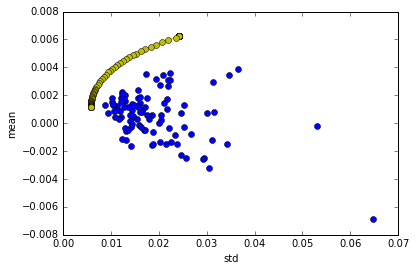

In [142]:
plt.plot(trainData.std(axis=0), trainData.mean(axis=0), 'o')
plt.ylabel('mean')
plt.xlabel('std')
plt.plot(risks, returns, 'y-o')

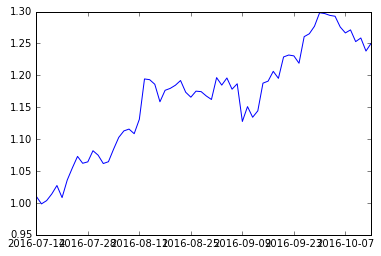

In [171]:
#testData*weights
#weights.T
PortRets = weights.T*testData
PortRetsWeighted = (1+PortRets.sum(axis=1)).cumprod()
PortRetsWeighted.plot()
#0.000199*9.88801422e-10 #1.96771482978e-13
#0.010814*1.20037468e-09 #1.2980851789520002e-11